<img src = "https://media.istockphoto.com/vectors/happy-flat-people-characters-jumping-dancing-cartoons-in-various-vector-id1031423064" align = right width = 450>
<h1 align = left> Data 765: Final Project</h1>
<h2 align = left> Research Question : Is there a link between marriage and happiness? </h2>
<h3 align = left> By :  Rameasa Arna </h3>

# Introduction

One of the most powerful indicators of overall happiness rely on marital status. There is a substantial and ubiquitous link between married status and happiness. In this research, we'll use GSS to look at the relationship between happiness and marital status, which has been collecting data on modern American society since 1972 in order to track and analyze trends in attitudes, actions, and belief. We only used a sample of the 2012 GSS survey for this article, which included 1974 observations and 221 variables. We constructed a subset with four variables for our research topic. Two of the control variables are "age" and "sex."

We assumed that married people are happier than other types of people before looking into the facts. This belief is based on the fact that when people have a partner, they can discuss everything, which gives them mental serenity.

# Data

In [1]:
import pandas as pd                
import numpy as np   
import matplotlib.pyplot as plt  
import seaborn as sns 
%matplotlib inline                                  
path = 'https://raw.githubusercontent.com/UC-MACSS/persp-analysis/master/assignments/exploratory-data-analysis/data/gss2012.csv'

df = pd.read_csv(path, header=0)  
df.columns.values
# making a new dataframe with the cols using for the research topic

happiness = df[['marital', "sex","age", "happy"]]
print(happiness.info())
print(happiness.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1974 entries, 0 to 1973
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   marital  1974 non-null   object 
 1   sex      1974 non-null   object 
 2   age      1969 non-null   float64
 3   happy    1964 non-null   object 
dtypes: float64(1), object(3)
memory usage: 61.8+ KB
None
         marital     sex   age         happy
0  Never married    Male  22.0    VERY HAPPY
1  Never married    Male  21.0    VERY HAPPY
2        Married    Male  42.0  PRETTY HAPPY
3        Married  Female  49.0    VERY HAPPY
4      Separated  Female  70.0    VERY HAPPY


# Variable : happy

In [6]:
happiness.happy.unique()

['VERY HAPPY', 'PRETTY HAPPY', 'NOT TOO HAPPY', NaN]
Categories (3, object): ['NOT TOO HAPPY' < 'PRETTY HAPPY' < 'VERY HAPPY']

In [7]:
happiness.happy = pd.Categorical(happiness.happy, 
            categories=['NOT TOO HAPPY', 'PRETTY HAPPY', 'VERY HAPPY'],   
            ordered=True)                                                     
happiness.happy.unique() 


['VERY HAPPY', 'PRETTY HAPPY', 'NOT TOO HAPPY', NaN]
Categories (3, object): ['NOT TOO HAPPY' < 'PRETTY HAPPY' < 'VERY HAPPY']

Happy has three categories, We have turned the happy variable into ordinal categorical variable 

In [8]:
happiness.happy.value_counts()

PRETTY HAPPY     1094
VERY HAPPY        593
NOT TOO HAPPY     277
Name: happy, dtype: int64

Text(0, 0.5, 'Happiness Level')

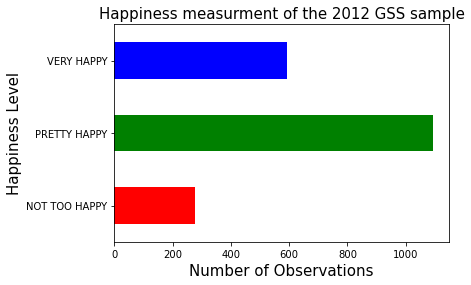

In [9]:
happiness.groupby('happy').size().plot(kind='barh', color=['red', 'green', 'blue'])
plt.title('Happiness measurment of the 2012 GSS sample', fontsize=15)
plt.xlabel('Number of Observations', fontsize=15)
plt.ylabel('Happiness Level', fontsize=15)

Happiness is a three-category ordinal variable: very happy, pretty happy, and not too happy. According to the graph, most people are generally happy, and the percentage of individuals who are not too happy is lower than the percentage of people who are pretty happy or very happy.

# Variable : marital

In [10]:
happiness.marital.unique()

array(['Never married', 'Married', 'Separated', 'Widowed', 'Divorced'],
      dtype=object)

In [11]:
happiness.marital.value_counts()

Married          900
Never married    526
Divorced         317
Widowed          163
Separated         68
Name: marital, dtype: int64

Text(0, 0.5, 'Number of Observations')

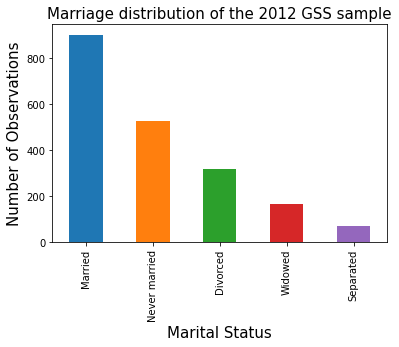

In [12]:
happiness.groupby('marital').size().sort_values(ascending=False).plot(kind='bar', color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.title('Marriage distribution of the 2012 GSS sample', fontsize=15)
plt.xlabel('Marital Status', fontsize=15)
plt.ylabel('Number of Observations', fontsize=15)

The marital status of the respondent is represented by the variable marital. According to the data, the majority of people are married, with the fewest persons being separated.

 # Variable : sex

In [13]:
happiness.sex.unique()

array(['Male', 'Female'], dtype=object)

In [14]:
happiness.sex.value_counts()

Female    1088
Male       886
Name: sex, dtype: int64

Text(0, 0.5, 'Number of Observations')

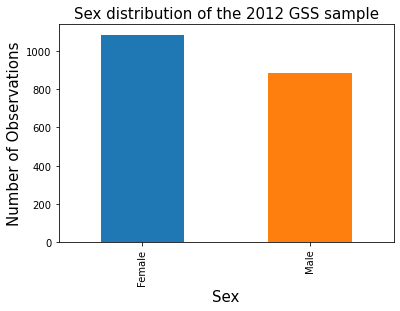

In [15]:
happiness.groupby('sex').size().plot(kind='bar',color = ['#1f77b4', '#ff7f0e'])
plt.title('Sex distribution of the 2012 GSS sample', fontsize=15)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Number of Observations', fontsize=15)

It is evident from this graph that there are more female respondents than male respondents.


 # Variable : age

In [16]:
 happiness.age.describe()

count    1969.000000
mean       48.193499
std        17.687113
min        18.000000
25%        33.000000
50%        47.000000
75%        61.000000
max        89.000000
Name: age, dtype: float64

Text(0, 0.5, 'Number of Observations')

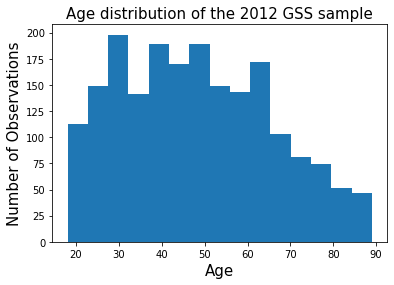

In [17]:
happiness.age.plot(kind='hist', bins = 15) 
plt.title('Age distribution of the 2012 GSS sample', fontsize=15)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Number of Observations', fontsize=15)

The variable age is normally distributed and majority of the responses appear to be between the ages of 25 and 65, with a few respondents between the ages of 70 and 90.

# Data Transformation

In [18]:
#Drop Missing Values in Selected Columns Only

happiness = happiness.dropna()
happiness.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1959 entries, 0 to 1973
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   marital  1959 non-null   object  
 1   sex      1959 non-null   object  
 2   age      1959 non-null   float64 
 3   happy    1959 non-null   category
dtypes: category(1), float64(1), object(2)
memory usage: 63.2+ KB


During the data transformation, we didn't make many changes. There are no missing sex or marital values. However, there are ten missing values for happy and five missing values for age. As a result, we simply removed the NA values for the variables happy and age. The data originally contained 1974 entries, but after removing the NAs, it currently contains 1959 entries. Furthermore, we modified the dtype of happy to an ordinal categorical one.

# Data Analysis

## Method 

The association between happiness and marital status will be examined in this study. The two control variables, sex and age, will then be added to see if the link between happiness and marital status changes. We'll utilize crosstabulations to see how happiness changes by marital status in order to investigate this.

## Crosstab of happy and marital status


In [19]:
import scipy.stats as stats              
crosstab = happiness.groupby(["marital", "happy"]).size().unstack()
stats.chi2_contingency(crosstab)

(155.3293764378314,
 1.5137528452630472e-29,
 8,
 array([[ 43.91832568, 175.19244513,  94.8892292 ],
        [125.18121491, 499.35426238, 270.46452272],
        [ 73.29045431, 292.35936702, 158.35017866],
        [  9.23124043,  36.82388974,  19.94486983],
        [ 22.37876468,  89.27003573,  48.35119959]]))

The p-value here is less than .05 which means there is a statistically significant relationship between marital status and  happy. 

In [20]:
pd.crosstab(values=happiness["marital"],
            index=happiness["marital"],
            columns=happiness["happy"],
            aggfunc='count',
            normalize='index')

happy,NOT TOO HAPPY,PRETTY HAPPY,VERY HAPPY
marital,,,
Divorced,0.191083,0.605096,0.203822
Married,0.069274,0.511732,0.418994
Never married,0.188931,0.603053,0.208015
Separated,0.363636,0.484848,0.151515
Widowed,0.181250,0.606250,0.212500


We can see from the table that most people are happy, regardless of their marital status. Married people, on the other hand, have the highest number of people who are very happy, at 42 percent. Furthermore, only 6% of married people are "not very happy," which is a very low ratio compared to the rest of the group. When the percentages of pretty happy and happy are added together, it becomes evident that married people are the happiest of all the groups.

Text(0, 0.5, 'proportion')

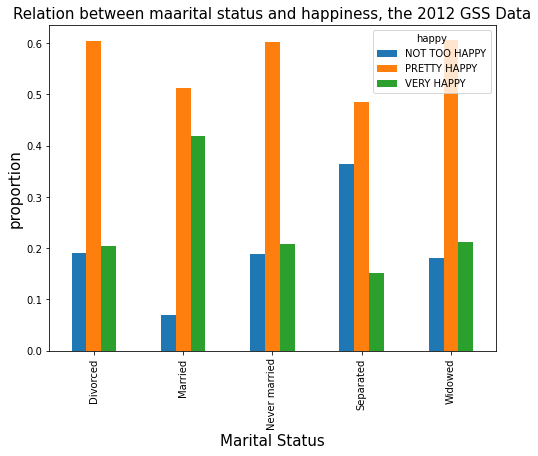

In [21]:
pd.crosstab(values=happiness["marital"],
            index=happiness["marital"],
            columns=happiness["happy"],
            aggfunc='count',
            normalize='index').plot(kind='bar', 
                                    figsize=(8, 6)) 

plt.title('Relation between maarital status and happiness, the 2012 GSS Data', fontsize=15)
plt.xlabel('Marital Status', fontsize=15)
plt.ylabel('proportion', fontsize=15)
                                    

The relationship between marital status and happiness is depicted in this diagram. It is evident from the graphic that married people are generally happy.

## Crosstab of age, happy and marital status

In [22]:
happiness.pivot_table(values="age",
                index="marital",
                columns="happy",                                         
                aggfunc='median')

happy,NOT TOO HAPPY,PRETTY HAPPY,VERY HAPPY
marital,,,
Divorced,54.0,53.0,56.5
Married,48.0,48.0,48.0
Never married,35.0,30.0,27.0
Separated,54.5,42.0,45.5
Widowed,72.0,75.0,76.5


Text(0.5, 1.0, 'Relationship Between Age, Happy and Marital Status')

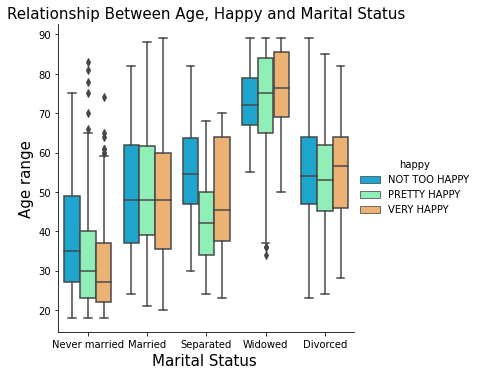

In [23]:
sns.catplot(x="marital",             # again, layout matters
            y="age", 
            hue='happy',
            kind='box',
            palette='rainbow',
            data=happiness)

    
plt.xlabel( 'Marital Status ', fontsize=15)
plt.ylabel ('Age range' , fontsize=15)
plt.title('Relationship Between Age, Happy and Marital Status', fontsize=15)

The visualization represent the relation between age, marital status and happiness. It shows that age doesn't have much affect on age as the distribution is same for married couple and rest of the groups.  

## Crosstab of sex, happy and marital status

In [24]:
pd.crosstab(values=happiness["sex"],
            index=happiness["happy"],
            columns=happiness["sex"],
            aggfunc='count',
            normalize='index')

sex,Female,Male
happy,,
NOT TOO HAPPY,0.551095,0.448905
PRETTY HAPPY,0.540714,0.459286
VERY HAPPY,0.565878,0.434122


The association between happiness and sex is shown in the crosstab. We can see that females are happier than males, and the same can be said for those who are not too happy. Because there are more female respondents than males, the female proportion is likely to be larger than the male percentage. Our control variable is sex; now we'll add sex to examine if the relationship between happiness and marital status changes.

In [25]:
happiness.groupby(["marital", "sex"])["happy"].value_counts(normalize=True).unstack()

happy                 NOT TOO HAPPY  PRETTY HAPPY  VERY HAPPY
marital       sex                                            
Divorced      Female       0.176136      0.619318    0.204545
              Male         0.210145      0.586957    0.202899
Married       Female       0.072165      0.492784    0.435052
              Male         0.065854      0.534146    0.400000
Never married Female       0.192308      0.600000    0.207692
              Male         0.185606      0.606061    0.208333
Separated     Female       0.350000      0.500000    0.150000
              Male         0.384615      0.461538    0.153846
Widowed       Female       0.181034      0.577586    0.241379
              Male         0.181818      0.681818    0.136364

Text(0.5, 1.0, 'Relationship Between sex, Happy and Marital Status')

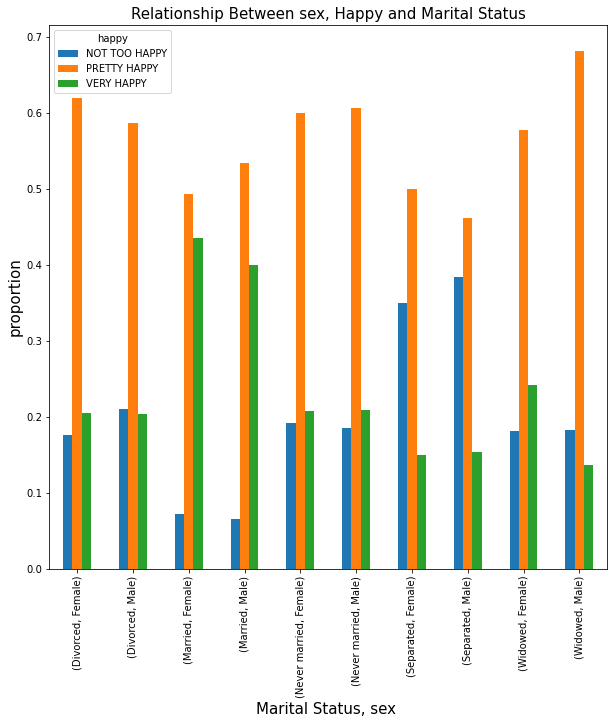

In [26]:
happiness.groupby(["marital", "sex"])["happy"].value_counts(normalize=True).unstack().plot(kind ="bar", figsize=(10, 10) )
plt.xlabel( 'Marital Status, sex ', fontsize=15)
plt.ylabel ('proportion' , fontsize=15)
plt.title('Relationship Between sex, Happy and Marital Status', fontsize=15)


This is a visual representation of the crosstab we made with sex, marital status, and happiness. According to the graphic, the lowest percentage of married women and men are "not too happy," with the gap between the male and happy being only 0.5 percent. Furthermore, 43 percent of married women and 40 percent of married men are "very happy," which is greater than the rest of the groups. We can conclude that females are happier than males among married respondents. On the other hand, married people, regardless of gender, are less pretty happy than other groups of people.

We can observe that nearly 93 percent of married males and 92 percent of married females are happy after adding the percentages of pretty happy and very happy. The rest of the group is content, with 70 percent to 80 percent of respondents happy. As a result, we can conclude that married men are happier.

# Conclusion

We can infer from the findings that married people are indeed happier. The crosstab analysis backs up the result. We can observe that introducing the control variable age has little effect on happiness and marital status. Using the sex variable, however, we can see that the assumption is valid in some ways. There are numerous other factors that influence happiness.